In [133]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
ins_data = pd.read_csv('Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv')

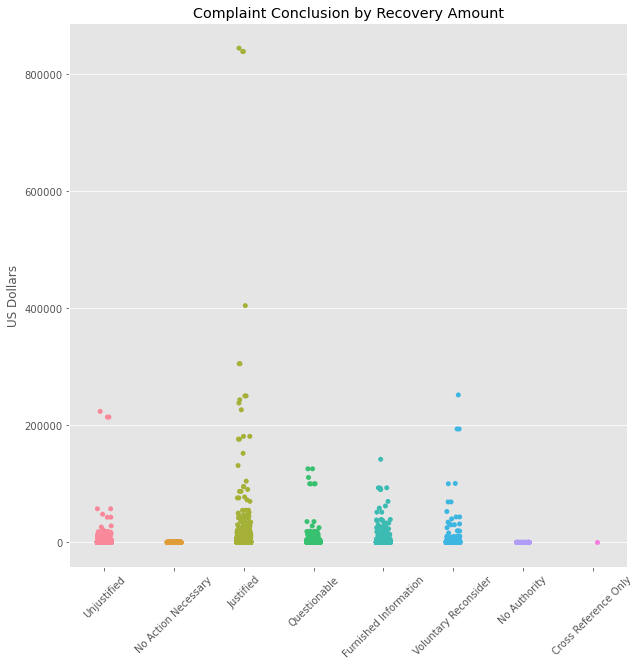

In [4]:
# Looking at which Conclusions had the highest recovery amounts
labels = ['Unjustified', 'No Action Necessary', 'Justified',
       'Questionable', 'Furnished Information', 'Voluntary Reconsider',
       'No Authority', 'Cross Reference Only']
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.stripplot(x=ins_data['Conclusion'].dropna(), y=ins_data['Recovery'], jitter=0.1)
ax.set_xticklabels(labels=labels, rotation=45)
ax.set(title= 'Complaint Conclusion by Recovery Amount', xlabel = None, ylabel='US Dollars');

In [5]:
# Because justified claims tend to have higher payouts, selecting justified from the Conclusion column
# to see which SubReasons were most frequent
ins_data[ins_data['Conclusion'] == 'Justified'].groupby('SubReason') \
                                    .count().sort_values('Company', ascending=False).head(25)

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,Disposition,Conclusion,Recovery,Status
SubReason,,,,,,,,,,,
Claim Delays,340,340,340,337,262,37,340,340,340,340,340
Denial of Claim,308,308,308,307,249,89,308,308,308,308,308
Unsatisfactory Settlement,140,140,140,139,119,60,140,140,140,140,140
Claim Procedure,139,139,139,138,102,50,139,139,139,139,139
Comparative Negligence,93,93,93,93,77,0,93,93,93,93,93
Non-Renewal,77,77,77,75,60,0,77,77,77,77,77
Excessive Charges,65,65,65,65,57,0,65,65,65,65,65
Unsatisfactory Offer,63,63,63,63,50,0,63,63,63,63,63
Eligibility of Provider,61,61,61,59,46,46,61,61,61,61,61


In [6]:
# Selecting rows with sub_reasons identified as potentially resulting in high legal fees. While there were 
# three SubReasons associated with "delays", two had a count of one so were excluded
# All reasons below were in the top 20 for justified conclusions, which is in line with Chadwell's comment that these 
# reasons are hard to fight
sub_reasons = ins_data[ins_data['SubReason'].isin(['Unsatisfactory Offer', 
                                                 'Premium/Notice', 'Premium/Rate Increase', 'Medical Necessity',
                                                'Actual Cash Value', 'Claim Delays', 
                                                 'Denial of Claim'])]

In [7]:
sub_reasons['SubReason'].value_counts()

Denial of Claim          2503
Claim Delays             1935
Premium/Notice            545
Premium/Rate Increase     540
Unsatisfactory Offer      523
Medical Necessity         426
Name: SubReason, dtype: int64

In [8]:
# Selecting rows related to auto coverage, dropping status column
auto_df = sub_reasons[sub_reasons['Coverage'].notna()]
auto_df = auto_df[auto_df['Coverage'].str.contains('Auto')].drop(columns='Status')
auto_df['SubReason'].value_counts()

Claim Delays            894
Denial of Claim         744
Unsatisfactory Offer    235
Premium/Notice          156
Name: SubReason, dtype: int64

In [9]:
# Adding complaint duration column in months
auto_df['Closed']= pd.to_datetime(auto_df['Closed'])
auto_df['Opened']= pd.to_datetime(auto_df['Opened'])
auto_df['Complaint Duration'] = auto_df['Closed'] - auto_df['Opened']
auto_df['Complaint Duration'] = (auto_df['Complaint Duration'] / np.timedelta64(1, 'M')).round(2)
auto_df.sort_values('Complaint Duration', ascending=False)

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Complaint Duration
3490,HDI Global Insurance Company,403046,2014-06-12,2016-01-15,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.00,19.12
5544,SPARTA Insurance Company,403046,2014-06-12,2016-01-15,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.00,19.12
2807,21st Century Premier Insurance Company,700430,2017-01-25,2018-04-18,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Claim Settled,Unjustified,446.65,14.72
9125,Mid-Century Insurance Company,705202,2017-11-15,2019-01-25,Auto Medical Payment,NaN,Unfair Claims Practice,Denial of Claim,Company Position Upheld,Unjustified,0.00,14.32
3008,LM General Insurance Company,802444,2018-05-23,2019-03-05,Auto,NaN,Premium and Rating,Premium/Notice,Premium Refund,Voluntary Reconsider,682.08,9.40
...,...,...,...,...,...,...,...,...,...,...,...,...
9297,Standard Fire Insurance Company (The),902560,2019-06-07,NaT,Auto,NaN,Premium and Rating,Premium/Notice,NaN,NaN,0.00,NaN
9535,Permanent General Assurance Corporation,902608,2019-06-10,NaT,Auto Physical Damage,NaN,Unfair Claims Practice,Denial of Claim,NaN,NaN,0.00,NaN
9591,Travelers Property Casualty Company of America,902612,2019-06-10,NaT,Auto Liability,NaN,Unfair Claims Practice,Denial of Claim,NaN,NaN,0.00,NaN
10004,Progressive Casualty Insurance Company,902559,2019-06-07,NaT,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,NaN,NaN,0.00,NaN


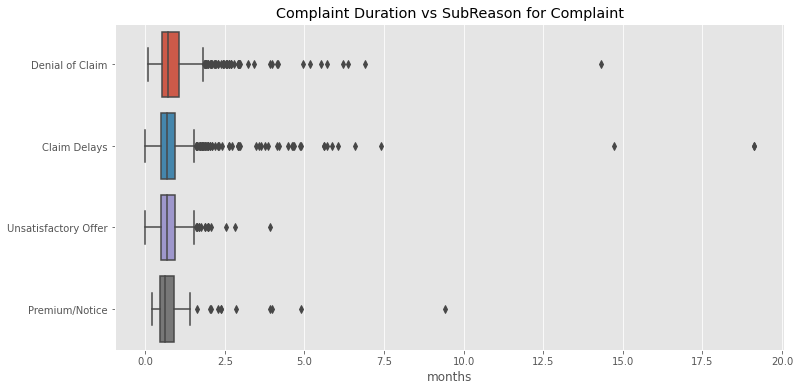

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(x=auto_df['Complaint Duration'], y=auto_df['SubReason'])
ax.set(title= 'Complaint Duration vs SubReason for Complaint', xlabel='months', ylabel=None);

In [11]:
# looking at various stats

auto_df[['SubReason', 'Complaint Duration']].groupby('SubReason')['Complaint Duration'].max()


SubReason
Claim Delays            19.12
Denial of Claim         14.32
Premium/Notice           9.40
Unsatisfactory Offer     3.91
Name: Complaint Duration, dtype: float64

In [12]:
# next steps - start company analysis and normalize for company size. Look at data for top 5 auto 
# (go with well-known rather than count, as that would require finding financial information for 616 companies

In [13]:
# Choosing Allstate, GEICO, Progressive, State Farm from the top ten- some of these companies have more than one name
top_10_auto = auto_df['Company'].value_counts()[0:10]
top_10_auto = top_5_auto.to_frame().reset_index()

top_10_auto = top_5_auto.rename(columns={'index':'Company', 'Company':'No. Complaints'})
top_10_auto

NameError: name 'top_5_auto' is not defined

In [14]:
# I think the only way to display what I want is with a grouped bar chart. Or, subplots
company_auto = auto_df[auto_df['Company'].isin(['Allstate Fire and Casualty Insurance Company', 
                                                'GEICO Indemnity Company', 'Progressive Direct Insurance Company', 
                                                'GEICO General Insurance Company', 'Progressive Casualty Insurance Company',
                                               'State Farm Mutual Automobile Insurance Company', 'Allstate Insurance Company'])]


In [29]:
company_auto

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Complaint Duration
14,Progressive Casualty Insurance Company,805221,2018-11-05,2018-12-04,Auto Liability,NaN,Unfair Claims Practice,Denial of Claim,Company Position Upheld,Unjustified,0.0,0.95
45,GEICO General Insurance Company,801258,2018-03-15,2018-04-02,Auto Physical Damage,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.0,0.59
55,GEICO General Insurance Company,802861,2018-06-20,2018-10-09,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Refer-Judicial/Attorney,Unjustified,0.0,3.65
111,Progressive Direct Insurance Company,801350,2018-03-19,2018-04-02,Auto Physical Damage,NaN,Unfair Claims Practice,Claim Delays,Company Position Upheld,Unjustified,0.0,0.46
112,Allstate Fire and Casualty Insurance Company,800358,2018-01-23,2018-04-02,Auto Liability,NaN,Unfair Claims Practice,Claim Delays,Claim Settled,Unjustified,0.0,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...
14362,GEICO General Insurance Company,802250,2018-05-11,2018-06-15,Auto Liability,NaN,Unfair Claims Practice,Denial of Claim,Company Position Upheld,Unjustified,0.0,1.15
14363,GEICO General Insurance Company,802361,2018-05-18,2018-06-15,Auto,NaN,Premium and Rating,Premium/Notice,Corrective Action,Justified,0.0,0.92
14392,Progressive Casualty Insurance Company,802528,2018-05-30,2018-06-19,Auto Physical Damage,NaN,Unfair Claims Practice,Denial of Claim,Contract Provision,Unjustified,0.0,0.66
14415,GEICO General Insurance Company,802427,2018-05-22,2018-06-20,Auto Physical Damage,NaN,Unfair Claims Practice,Claim Delays,Claim Settled,Questionable,0.0,0.95


In [110]:
# Pulling value counts for each SubReason and company
prog_cas = company_auto[company_auto['Company'] == 'Progressive Casualty Insurance Company'].groupby('SubReason').count()
prog_dic = company_auto[company_auto['Company'] == 'Progressive Direct Insurance Company'].groupby('SubReason').count()
allstate_fc = company_auto[company_auto['Company'] == 'Allstate Fire and Casualty Insurance Company'].groupby('SubReason').count()
geico_indem = company_auto[company_auto['Company'] == 'GEICO Indemnity Company'].groupby('SubReason').count()
geico_gen  = company_auto[company_auto['Company'] == 'GEICO General Insurance Company'].groupby('SubReason').count()
state_farm = company_auto[company_auto['Company'] == 'State Farm Mutual Automobile Insurance Company'].groupby('SubReason').count()
allstate = company_auto[company_auto['Company'] == 'Allstate Insurance Company'].groupby('SubReason').count()
allstate

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,Disposition,Conclusion,Recovery,Complaint Duration
SubReason,,,,,,,,,,,
Claim Delays,20,20,20,20,20,0,20,20,20,20,20
Denial of Claim,17,17,17,15,17,0,17,15,15,17,15
Premium/Notice,4,4,4,4,4,0,4,4,4,4,4
Unsatisfactory Offer,7,7,7,7,7,0,7,7,7,7,7


In [121]:
grouped_bar_data = pd.DataFrame([
        ('Allstate Fire and Casualty','Claim Delays', 66),
        ('Allstate Fire and Casualty','Denial of Claim', 71),
        ('Allstate Fire and Casualty','Unsatisfactory Offer', 14),
        ('Allstate Fire and Casualty','Premium/Notice', 20),
        ('GEICO Indemnity','Claim Delays', 67),
        ('GEICO Indemnity','Denial of Claim', 62),
        ('GEICO Indemnity','Unsatisfactory Offer', 5),
        ('GEICO Indemnity','Premium/Notice', 11),
        ('Progressive Direct','Claim Delays', 45),
        ('Progressive Direct','Denial of Claim', 65),
        ('Progressive Direct','Unsatisfactory Offer', 11),
        ('Progressive Direct','Premium/Notice', 6),
        ('GEICO General','Claim Delays', 58),
        ('GEICO General','Denial of Claim',40),
        ('GEICO General','Unsatisfactory Offer', 10),
        ('GEICO General','Premium/Notice', 18),
        ('Progressive Casualty', 'Claim Delays', 34),
        ('Progressive Casualty', 'Denial of Claim', 54),
        ('Progressive Casualty', 'Unsatisfactory Offer', 4),
        ('Progressive Casualty', 'Premium/Notice', 12),
        ('State Farm Mutual Automobile', 'Claim Delays', 40),
        ('State Farm Mutual Automobile', 'Denial of Claim', 14),
        ('State Farm Mutual Automobile', 'Unsatisfactory Offer', 7),
        ('State Farm Mutual Automobile', 'Premium/Notice', 9),
        ('Allstate', 'Claim Delays', 20),
        ('Allstate', 'Denial of Claim', 17),
        ('Allstate', 'Unsatisfactory Offer', 4),
        ('Allstate', 'Premium/Notice', 7),
    ], 
    columns=['Company', 'SubReason', 'value']
)
grouped_bar_data= grouped_bar_data.set_index(['Company', 'SubReason']).value



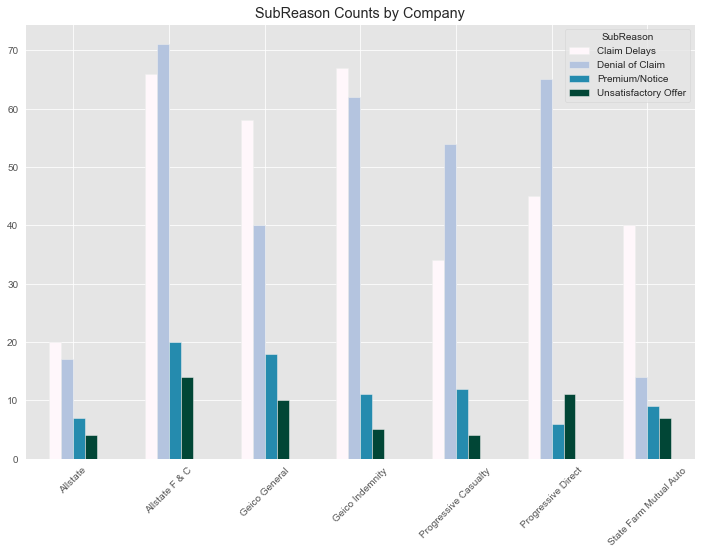

In [134]:
grp_labels = ['Allstate', 'Allstate F & C', 'Geico General', 'Geico Indemnity', 'Progressive Casualty', 
             'Progressive Direct', 'State Farm Mutual Auto']
# sns.set_style("darkgrid")
colors = ['mediumseagreen', 'skyblue', 'lightcoral', 'navajowhite']
vis = grouped_bar_data.unstack().plot(kind='bar', stacked=False, figsize=(12,8), colormap='PuBuGn')
vis.set_xticklabels(labels=grp_labels, rotation=45)
vis.set_xlabel(None)
vis.set_title('SubReason Counts by Company')
sns.color_palette("tab10")
plt.savefig('Auto_subreason_company_counts')

In [71]:
type(grouped_bar_data)

pandas.core.series.Series

In [43]:
data

Company                       SubReason           
Allstate Fire and Casualty    Claim Delays            100
                              Denial of Claim         300
                              Unsatisfactory Offer    300
                              Premium/Notice          300
GEICO Indemnity               Claim Delays            200
                              Denial of Claim         350
                              Unsatisfactory Offer    200
                              Premium/Notice          350
Progressive Direct            Claim Delays            300
                              Denial of Claim         400
                              Unsatisfactory Offer    300
                              Premium/Notice          400
GEICO General                 Claim Delays            400
                              Denial of Claim         450
                              Claim Delays            400
                              Denial of Claim         450
Progressive Casualty 